In [1]:
import numpy as np
import pandas  as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from scipy import linalg
from math import sqrt

In [2]:
client1 =np.load("client1.npz")
client2 =np.load("client2.npz")
client3 =np.load("client3.npz")
client2.files

['X_a2_sc', 'y_a2']

In [3]:
X_a1_t,X_a1_s,y_a1_t,y_a1_s  = client1["X_a1_sc"][:100],client1["X_a1_sc"][100:],client1["y_a1"][:100],client1["y_a1"][100:]
X_a2_t,X_a2_s,y_a2_t,y_a2_s  = client2["X_a2_sc"][:1000],client2["X_a2_sc"][1000:],client2["y_a2"][:1000],client2["y_a2"][1000:]
X_a3_t, X_a3_s, y_a3_t, y_a3_s = client3["X_a3_sc"][:10000],client3["X_a3_sc"][10000:],client3["y_a3"][:10000],client3["y_a3"][10000:]
                                                  
X_a1_t.shape, y_a1_s.shape,X_a2_t.shape,y_a2_s.shape,X_a3_t.shape, X_a3_s.shape

((100, 8), (312,), (1000, 8), (4080,), (10000, 8), (5148, 8))

In [4]:
# l is Number of hidden neurons
    
def ELM_L2(l, X_train, X_test, y_train, y_test, alpha = 1e-5):
    
    # Generate random input-to-hidden weights and bias
    n = X_train.shape[1]
    w = np.random.randn(n, l)
    b = np.random.randn(1, l)
    
    
    # Compute the hidden layer output 
    H = np.tanh(np.dot(X_train, w) + b)  # Apply activation function (tanh)
    
    # Calculate the output weights using the Moore-Penrose pseudoinverse
    B = np.dot(linalg.pinv(H.T.dot(H) + alpha *np. eye(l)), H.T.dot(y_train)) #output_weights
    

    # Calculate the predicted output on the training set
    pred_train = np.dot(H, B)

    # Calculate the predicted output on the testing set
    H_test = np.tanh(np.dot(X_test, w) + b)
    pred_test = np.dot(H_test, B)

    # Calculate the mean squared error on the training and testing sets
    #rmse_train = sqrt(mean_squared_error(y_train, pred_train))
    rmse_test = sqrt(mean_squared_error(y_test, pred_test))
    r2 = r2_score(y_test, pred_test)
    

    return r2 ,w ,B , b  


The root mean square error (RMSE) measures the average difference between a statistical model's predicted values and the actual values. Mathematically, it is the standard deviation of the residuals. Residuals represent the distance between the regression line and the data points.

In [5]:
c1_par_L2= np.load("client1_par_L2.npz") #neurons and alpha
c2_par_L2= np.load("client2_par_L2.npz") #neurons and alpha
c3_par_L2= np.load("client3_par_L2.npz") #neurons and alpha

In [6]:
c1_par_L2.files

['w', 'B', 'b', 'n_nuerons', 'reg_cof']

In [7]:
# Print the accuracies for different training data sizes
def acc_test_L2(X, y, X_test, y_test,l=10,alpha=1e-2,start=10,ranges=10):
    #acc = {}
    acc_r2 = {}
    for size in range(start, len(X)+1, ranges):
        r2,_,_,_=ELM_L2(l, X[:size], X_test, y[:size], y_test, alpha)
        acc_r2[size] = r2
        #acc[size]=rmse
    return  acc_r2


# Print the accuracies for different training data sizes
def acc_test_bias(X,y,l=10,start=10, ranges=10):
    accuracies = {}
    accuracies_r2 = {}
    for size in range(start, len(X), ranges):
        r2,rmse,_,_,_=ELM_bias(l, X[:size],X[size:],y[:size],y[size:])
        accuracies_r2[size] = r2
        accuracies[size]=rmse
    return accuracies, accuracies_r2

For client 1

In [8]:
l_L2= int(c1_par_L2["n_nuerons"]) # l is Number of hidden neurons
alpha_L2= float(c1_par_L2["reg_cof"])
l_L2, alpha_L2, 

(20, 0.001)

In [9]:
c1_r2_L2 = acc_test_L2(X_a1_t, y_a1_t, X_a1_s, y_a1_s, l=l_L2,alpha=alpha_L2,start=10, ranges=10)


In [10]:
c1_k_r2_L2=list(c1_r2_L2.keys())
c1_v_r2_L2=list(c1_r2_L2.values())

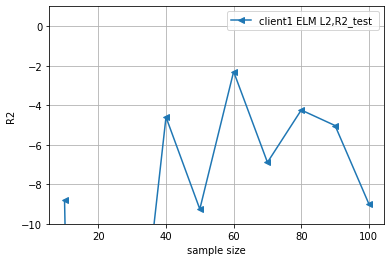

In [34]:
plt.plot(c1_k_r2_L2,c1_v_r2_L2, label="client1 ELM L2,R2_test ",marker='<')
#plt.plot(c1_k_r2_bias,c1_v_r2_bias, label="client1 ELM bias,R2_tes ",marker='<')
plt.grid("major")
plt.ylim(-10, 1)
plt.xlabel("sample size")
plt.ylabel("R2 ")
#plt.gca().invert_xaxis()
plt.legend()
plt.show()

plt.plot(c1_k_r2_bias,c1_v_r2_bias, label="client1 ELM bias,R2_tes ",marker='<')
plt.xlabel("sample size")
plt.ylabel("root mean square error ")
plt.ylim(-10, 1)
#plt.gca().invert_xaxis()
plt.legend()

For client2

In [35]:
c2_l_L2= int(c2_par_L2["n_nuerons"]) # l is Number of hidden neurons
c2_alpha_L2= float(c2_par_L2["reg_cof"])


In [36]:
c2_r2_L2 = acc_test_L2(X_a2_t, y_a2_t, X_a2_s, y_a2_s, l=c2_l_L2,alpha=alpha_L2,start=100, ranges=100)


In [37]:
c2_k_r2_L2=list(c2_r2_L2.keys())
c2_v_r2_L2=list(c2_r2_L2.values())

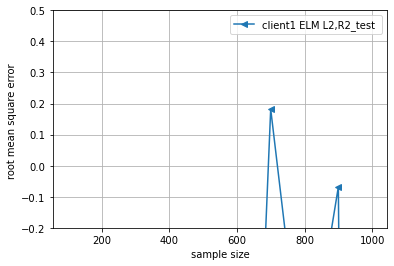

In [38]:

plt.plot(c2_k_r2_L2,c2_v_r2_L2, label="client1 ELM L2,R2_test ",marker='<')
plt.xlabel("sample size")
plt.grid("major")
plt.ylim(-0.2, 0.5)
plt.ylabel("root mean square error ")
#plt.gca().invert_xaxis()
plt.legend()

For client3

In [39]:
c3_l_L2= int(c3_par_L2["n_nuerons"]) # l is Number of hidden neurons
c3_alpha_L2= float(c3_par_L2["reg_cof"])


In [40]:
c3_r2_L2 = acc_test_L2(X_a3_t, y_a3_t, X_a3_s, y_a3_s, l=c3_l_L2,alpha=alpha_L2, start=100, ranges=100)


In [41]:
c3_k_r2_L2=list(c3_r2_L2.keys())
c3_v_r2_L2=list(c3_r2_L2.values())

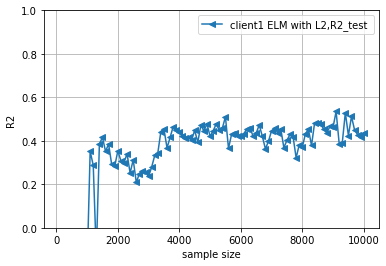

In [42]:

plt.plot(c3_k_r2_L2,c3_v_r2_L2, label="client1 ELM with L2,R2_test ",marker='<')
plt.xlabel("sample size")
plt.ylabel("R2 ")
plt.grid("major")
plt.ylim(0, 1)
#plt.gca().invert_xaxis()
plt.legend()

Label Noise

In [43]:
# For client one
def r2_v(Xt,Xs, yt, ys, r_percent, l, alpha, start, ranges):

    
    s_toReplace = int(r_percent / 100 * len(yt))
    index_toReplace = np.random.choice(len(yt), s_toReplace, replace=False)
    r_indices = np.random.choice(len(yt), s_toReplace, replace=True)
    yt[index_toReplace] = yt[r_indices]

 

    lN_r2 = acc_test_L2(Xt, yt, Xs, ys, l=l,alpha=alpha,start=start, ranges=ranges)

    lN_k=list(lN_r2.keys())
    lN_v=list(lN_r2.values())
    
    return lN_k, lN_v


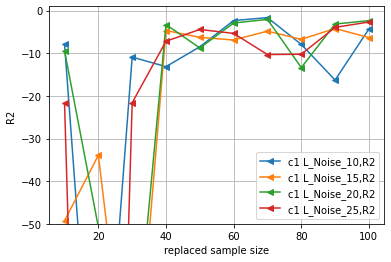

In [44]:
# Graph r2 For client one
c1_l_L2= int(c1_par_L2["n_nuerons"]) # l is Number of hidden neurons
c1_alpha_L2= float(c1_par_L2["reg_cof"])

c1_r2_key_rep ={}
c1_v_values_rep={}
c1_start=10
c1_ranges=10
n_samples = [5,10,15,20,25,30,35,40]
for r_percent in n_samples:
    c1_r2_key, c1_r2_v=r2_v(X_a1_t, X_a1_s,y_a1_t, y_a1_s, r_percent, c1_l_L2, c1_alpha_L2, c1_start, c1_ranges)
    c1_r2_key_rep[r_percent]=c1_r2_key
    c1_v_values_rep[r_percent]=c1_r2_v


plt.plot(c1_r2_key_rep[10],c1_v_values_rep[10], label="c1 L_Noise_10,R2",marker='<')
plt.plot(c1_r2_key_rep[15],c1_v_values_rep[15], label="c1 L_Noise_15,R2",marker='<')
plt.plot(c1_r2_key_rep[20],c1_v_values_rep[20], label="c1 L_Noise_20,R2",marker='<')
plt.plot(c1_r2_key_rep[25],c1_v_values_rep[25], label="c1 L_Noise_25,R2",marker='<')
#plt.plot(c1_r2_key_rep[30],c1_v_values_rep[30], label="c1 L_Noise_30,R2",marker='<')
#plt.plot(c1_r2_key_rep[35],c1_v_values_rep[35], label="c1 L_Noise_35,R2",marker='<')
#plt.plot(c1_r2_key_rep[40],c1_v_values_rep[40], label="c1 L_Noise_40,R2",marker='<')
#plt.plot(c1_k_r2_bias,c1_v_r2_bias, label="client1 ELM bias,R2_tes ",marker='<')
plt.grid("major")
plt.ylim(-50, 1)
plt.xlabel("replaced sample size")
plt.ylabel("R2 ")
#plt.gca().invert_xaxis()
plt.legend()
plt.show()
  
   

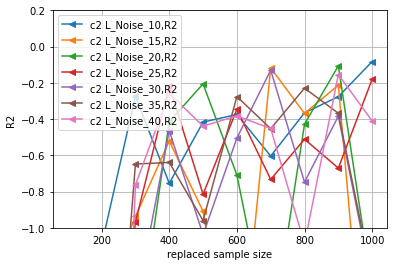

In [47]:
# For client Two
c2_l_L2= int(c2_par_L2["n_nuerons"]) # l is Number of hidden neurons
c2_alpha_L2= float(c2_par_L2["reg_cof"])

c2_r2_key_rep ={}
c2_v_values_rep={}
c2_start=100
c2_ranges=100
n_samples = [5,10,15,20,25,30,35,40]
for r_percent in n_samples:
    c2_r2_key, c2_r2_v=r2_v(X_a2_t, X_a2_s,y_a2_t, y_a2_s, r_percent, c2_l_L2, c2_alpha_L2, c2_start, c2_ranges)
    c2_r2_key_rep[r_percent]=c2_r2_key
    c2_v_values_rep[r_percent]=c2_r2_v


plt.plot(c2_r2_key_rep[10],c2_v_values_rep[10], label="c2 L_Noise_10,R2",marker='<')
plt.plot(c2_r2_key_rep[15],c2_v_values_rep[15], label="c2 L_Noise_15,R2",marker='<')
plt.plot(c2_r2_key_rep[20],c2_v_values_rep[20], label="c2 L_Noise_20,R2",marker='<')
plt.plot(c2_r2_key_rep[25],c2_v_values_rep[25], label="c2 L_Noise_25,R2",marker='<')
plt.plot(c2_r2_key_rep[30],c2_v_values_rep[30], label="c2 L_Noise_30,R2",marker='<')
plt.plot(c2_r2_key_rep[35],c2_v_values_rep[35], label="c2 L_Noise_35,R2",marker='<')
plt.plot(c2_r2_key_rep[40],c2_v_values_rep[40], label="c2 L_Noise_40,R2",marker='<')
#plt.plot(c1_k_r2_bias,c1_v_r2_bias, label="client1 ELM bias,R2_tes ",marker='<')
plt.grid("major")
plt.ylim(-1, 0.2)
plt.xlabel("replaced sample size")
plt.ylabel("R2 ")
#plt.gca().invert_xaxis()
plt.legend()
plt.show()
  
   

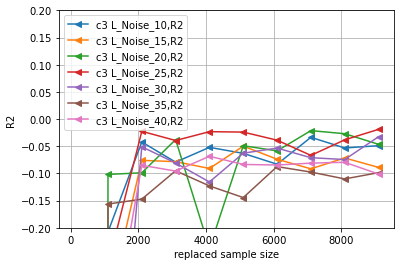

In [51]:
# For client Two
c3_l_L2= int(c3_par_L2["n_nuerons"]) # l is Number of hidden neurons
c3_alpha_L2= float(c3_par_L2["reg_cof"])

c3_r2_key_rep ={}
c3_v_values_rep={}
c3_start=100
c3_ranges=1000
n_samples = [5,10,15,20,25,30,35,40]
for r_percent in n_samples:
    c3_r2_key, c3_r2_v=r2_v(X_a3_t, X_a3_s,y_a3_t, y_a3_s, r_percent, c3_l_L2, c3_alpha_L2, c3_start, c3_ranges)
    c3_r2_key_rep[r_percent]=c3_r2_key
    c3_v_values_rep[r_percent]=c3_r2_v


plt.plot(c3_r2_key_rep[10],c3_v_values_rep[10], label="c3 L_Noise_10,R2",marker='<')
plt.plot(c3_r2_key_rep[15],c3_v_values_rep[15], label="c3 L_Noise_15,R2",marker='<')
plt.plot(c3_r2_key_rep[20],c3_v_values_rep[20], label="c3 L_Noise_20,R2",marker='<')
plt.plot(c3_r2_key_rep[25],c3_v_values_rep[25], label="c3 L_Noise_25,R2",marker='<')
plt.plot(c3_r2_key_rep[30],c3_v_values_rep[30], label="c3 L_Noise_30,R2",marker='<')
plt.plot(c3_r2_key_rep[35],c3_v_values_rep[35], label="c3 L_Noise_35,R2",marker='<')
plt.plot(c3_r2_key_rep[40],c3_v_values_rep[40], label="c3 L_Noise_40,R2",marker='<')
#plt.plot(c1_k_r2_bias,c1_v_r2_bias, label="client1 ELM bias,R2_tes ",marker='<')
plt.grid("major")
plt.ylim(-0.2, 0.2)
plt.xlabel("replaced sample size")
plt.ylabel("R2 ")
#plt.gca().invert_xaxis()
plt.legend()
plt.show()
  
   